## 00 |

In [1]:
# [Basic Libraries]
import os # file management 
import pandas as pd # data manipulation
import numpy as np # numerical operations

# [Machine Learning]
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # train/test sets
from sklearn.linear_model import LogisticRegression # logistic model
from sklearn.metrics import confusion_matrix # confussion matrix metric

# [New!] How to deal with imbalanced Data?
from imblearn.over_sampling import RandomOverSampler # Random oversampling technique
from sklearn.metrics import classification_report # Metrics to check & compare our score

# [Settings]
import warnings
warnings.filterwarnings('ignore') # ignore warnings
pd.set_option('display.max_columns', None) # display all columns

## 01 | Data Extraction

In [12]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/01. IronLabs/unit_3_sql/lab-imbalanced-data/data", "Cdata.csv")
data = pd.read_csv(file_path, index_col=0) # to deal with an error `Unnamed: 0` column

## 02 | OverSampling with `RandomOverSampler`

In [13]:
# Selecting our library
ros = RandomOverSampler()

### X-Y Train Split

In [14]:
y = data['churn']
X = data.select_dtypes(include=[np.number]) # Selecting Numericals
X.head()

,seniorcitizen,tenure,monthlycharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


### Modeling

In [16]:
# Normalazing the data
transformer = StandardScaler().fit(X)

# Transformation
X = transformer.transform(X)

# Using RandomUnderSampler
X_ros, y_ros = ros.fit_resample(X, y)
transformer = StandardScaler().fit(X_ros)
X = transformer.transform(X_ros)

# We define train and test for X and Y
X_train, X_test, y_train, y_test = train_test_split(X, y_ros, test_size=0.3, random_state=100)

# test_size = We give 30% for testing and 70% for testing
# random_state = it'll improve the model to divide always the model in the same way

In [17]:
y.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [19]:
y_ros.value_counts()

No     5174
Yes    5174
Name: churn, dtype: int64

In [10]:
# Ta-Da!

### Logistic Regression

In [20]:
# We traing the training dataset using Logistic Regression
logistic = LogisticRegression(random_state=0).fit(X_train, y_train)

# Predictions
predictions = logistic.predict(X_test)

logistic.score(X_test, y_test)

0.7458937198067633

In [21]:
logistic_4 = classification_report(y_test, predictions)
print(logistic_4) # RandomOverSampler

              precision    recall  f1-score   support

          No       0.74      0.75      0.75      1557
         Yes       0.75      0.74      0.74      1548

    accuracy                           0.75      3105
   macro avg       0.75      0.75      0.75      3105
weighted avg       0.75      0.75      0.75      3105



<blockquote style="background-color: #d4edda; color: #155724; border-color: #c3e6cb; padding: 10px; border-radius: 5px;">
    
Our score is overall **1% better** after Upsampling (so it's better than undersampling, in this case. Question is, can this be improved?
</blockquote>

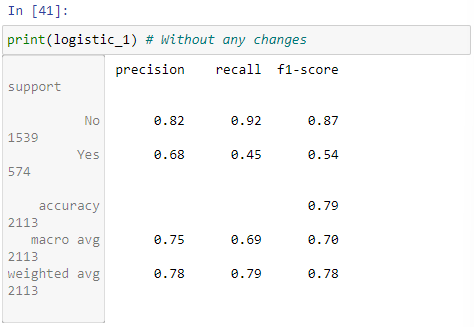

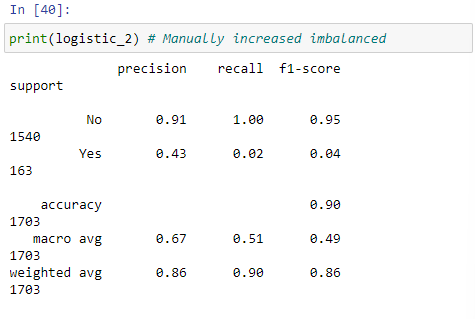

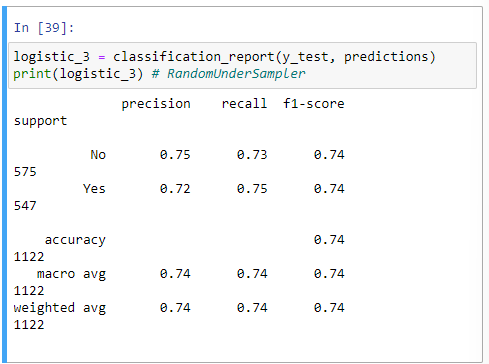